In [30]:
#full-image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('imgs/butterfly.jpg',0)

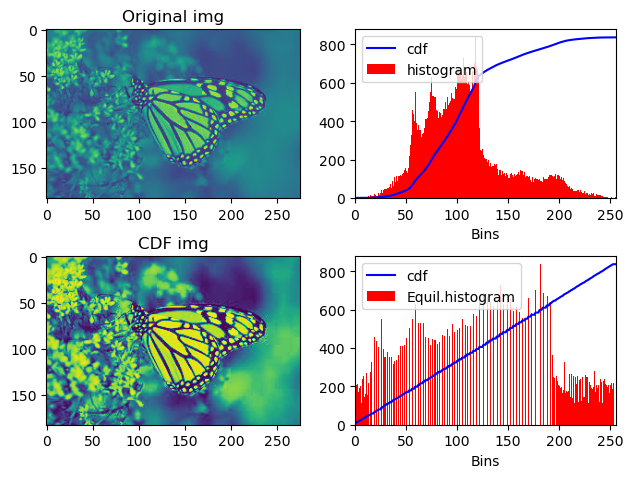

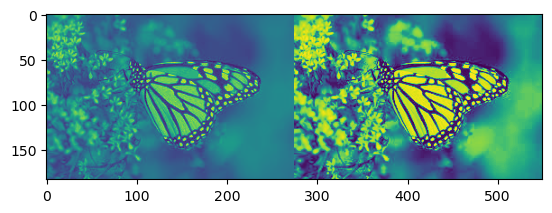

In [18]:
plt.subplot(221)
plt.imshow(img)
plt.title("Original img")

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max()) / cdf.max()
plt.subplot(222)
plt.plot(cdf_normalized,color = 'b')
plt.hist(img.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.xlabel('Bins')
plt.legend(('cdf','histogram'),loc = 'upper left')

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/cdf_m.max()-cdf_m.min()
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(223)
plt.imshow(img2)
plt.title('CDF img')

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max()) / cdf.max()
plt.subplot(224)
plt.plot(cdf_normalized,color = 'b')
plt.hist(img2.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.xlabel('Bins')
plt.tight_layout()
plt.legend(('cdf','Equil.histogram'),loc = 'upper left')
plt.show()

img1 = cv2.imread('imgs/butterfly.jpg',0)
equ = cv2.equalizeHist(img1)
res = np.hstack((img1,equ))
cv2.imwrite('res.png',res)
img3 = cv2.imread('res.png',0)
plt.imshow(img3)
plt.show()


In [29]:
#half - image

In [25]:
img = cv2.imread('imgs/butterfly.jpg',0)

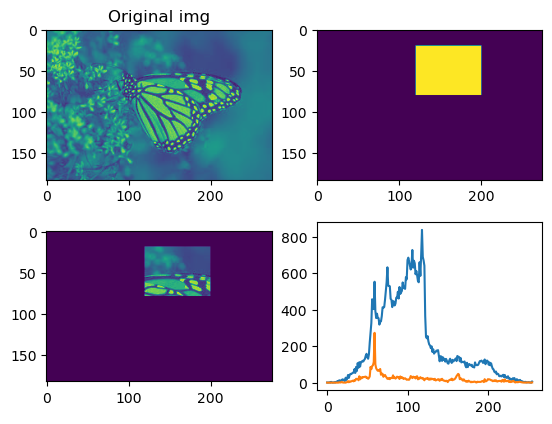

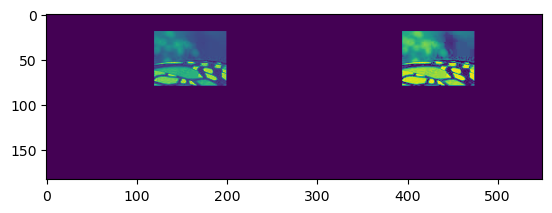

In [28]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[20:80,120:200] = 255
mask_img = cv2.bitwise_and(img,img,mask= mask)
#jsfskjf
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img),plt.title("Original img")
plt.subplot(222),plt.imshow(mask)
plt.subplot(223),plt.imshow(mask_img)
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.show()

eque = cv2.equalizeHist(mask_img)
img1 = np.hstack((mask_img,eque))
cv2.imwrite("oi.png",img1)
img2 = cv2.imread('oi.png',0)
plt.imshow(img2)
plt.show()